In [1]:
import os
import pandas as pd
import numpy as np
root_folder = '/home/hugo/MEGA/work/ASR/EUParliamentASR/hotwords_experiment/processed_data'


In [2]:

def get_hotwords_weight(filename:str) -> int:
    a = os.path.splitext(filename)[0]
    a = a.split('_')[1]
    a = int(a)
    return a

In [3]:
def get_motherfile_id(filename):
    basename = os.path.basename(filename)
    barename = os.path.splitext(basename)[0]
    motherfile_id = barename.split('_')[-1]

    return motherfile_id

In [4]:

for root, folders,files in os.walk(root_folder):

    # print(files)
    files = sorted(files, key=lambda x:get_hotwords_weight(x))
    print(files)
    dfs = []
    
    
    pivot_tables = []
    
    for i, file in enumerate(files):
        fullpath = os.path.join(root, file)
        df = pd.read_csv(fullpath, sep='\t', index_col=0)
        df=df.rename(columns = {'identifier':'meeting identifier'})
        df['F1'] = 2 * df.precision * df.recall/ (df.precision + df.recall)
        pivot_table = pd.pivot_table(df,values= ['recall', 'unrecognized_words', 'false_positive_hotwords', 'precision','WER'], index='meeting identifier', aggfunc=np.mean)

        df = df.dropna(subset = ['hotwords'])
        dfs.append(df)

        pivot_table
        pivot_tables.append(pivot_table)

['experiment_0_processed.csv', 'experiment_1_processed.csv', 'experiment_2_processed.csv', 'experiment_3_processed.csv', 'experiment_4_processed.csv', 'experiment_5_processed.csv', 'experiment_6_processed.csv', 'experiment_7_processed.csv', 'experiment_8_processed.csv', 'experiment_9_processed.csv', 'experiment_10_processed.csv']


In [5]:
pivot_tables[0]

,WER,false_positive_hotwords,precision,recall
meeting identifier,,,,
20140701,0.315593,0.0,1.000000,1.000000
20140714,0.254666,0.0,1.000000,0.533333
20140723,0.208967,0.1,0.950000,0.950000
20140904,0.248867,0.2,0.916667,0.916667
20140915,0.257170,0.2,0.933333,0.966667
20140925,0.251775,0.5,0.766667,0.741667
20141016,0.234425,0.3,0.866667,0.950000
20141106,0.262624,0.1,0.944444,0.900000
20141110,0.278908,0.2,0.875000,0.800000


In [6]:
def WER_formatter(wer_value):
    wer = wer_value * 100
    return f"{wer:.2f}"

def Pr_Rec_F1_formatter(value):
    return f"{value:.2f}"[1:]

In [7]:
# my_table = pivot_tables[3][['precision', 'recall', 'F1', 'WER']]
# my_table = my_table.drop(index = 20141211)

In [8]:
# my_formatters = {'WER': WER_formatter,
#                  'precision': Pr_Rec_F1_formatter,
#                  'recall':    Pr_Rec_F1_formatter,
#                  'F1':        Pr_Rec_F1_formatter}
# my_table.to_latex('table3.txt', formatters=my_formatters)

NameError: name 'my_table' is not defined

In [9]:
dfs[1].false_positive_hotwords.sum()

26

In [10]:
from collections import Counter

mycounter = Counter()
mycounter.update(dfs[1]['meeting identifier'])
mycounter

Counter({20140714: 10,
         20140723: 10,
         20140904: 10,
         20140915: 10,
         20140925: 10,
         20141016: 10,
         20141106: 10,
         20141110: 10,
         20141120: 10,
         20141211: 1})

In [11]:

for root, folders,files in os.walk(root_folder):

    # print(files)
    files = sorted(files, key=lambda x:get_hotwords_weight(x))
    print(files)
    dfs = []
    
    
    pivot_tables = []
    
    for i, file in enumerate(files):
        fullpath = os.path.join(root, file)
        df = pd.read_csv(fullpath, sep='\t', index_col=0)
        df=df.rename(columns = {'identifier':'meeting identifier'})
        df['F1'] = 2 * df.precision * df.recall/ (df.precision + df.recall)
        
        df = df.dropna(subset = ['hotwords'])
        dfs.append(df)
        

['experiment_0_processed.csv', 'experiment_1_processed.csv', 'experiment_2_processed.csv', 'experiment_3_processed.csv', 'experiment_4_processed.csv', 'experiment_5_processed.csv', 'experiment_6_processed.csv', 'experiment_7_processed.csv', 'experiment_8_processed.csv', 'experiment_9_processed.csv', 'experiment_10_processed.csv']


In [12]:
dfs[0]

,Sound_file,Length (s),Transcription,nr_words,words per second,meeting identifier,hotwords,inference,manual_entities,hotwords_in_inference,hotwords_not_in_inference,recall,unrecognized_words,false_positive_hotwords,precision,WER,F1
10,/data/voshpde/pipeLine/evaluation/transcriptio...,30,"(…) yes, thank you very much, I am vicky maeij...",72,2.400000,20140714,juri|fundamental|femm|reicherts|ms|chairs|weis...,mr president a vi i a member of the freedom pa...,freedom|party,2,0,1.000000,NaN,0,1.0,0.305556,1.000000
11,/data/voshpde/pipeLine/evaluation/transcriptio...,17,"okay, thank you for putting your objection so ...",32,1.882353,20140714,juri|fundamental|femm|reicherts|ms|chairs|weis...,ok thank you for putting your objection so pol...,slobodan,0,1,0.000000,slobodan,0,NaN,0.375000,NaN
12,/data/voshpde/pipeLine/evaluation/transcriptio...,20,"I would also, I would also like to greet the m...",32,1.600000,20140714,juri|fundamental|femm|reicherts|ms|chairs|weis...,i would also i would also like to agree the me...,libe|martine|juri|reicherts,2,2,0.500000,juri|reicherts,0,1.0,0.343750,0.666667
13,/data/voshpde/pipeLine/evaluation/transcriptio...,19,I would like to stress that the cooperation be...,33,1.736842,20140714,juri|fundamental|femm|reicherts|ms|chairs|weis...,i would like to stress that the cooperation be...,NaN,1,0,1.000000,NaN,0,1.0,0.090909,1.000000
14,/data/voshpde/pipeLine/evaluation/transcriptio...,15,"that overlap with the field of, of responsibil...",25,1.666667,20140714,juri|fundamental|femm|reicherts|ms|chairs|weis...,that overlap with the field of responsibility ...,juri,0,1,0.000000,juri,0,NaN,0.120000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,/data/voshpde/pipeLine/evaluation/transcriptio...,25,the commissions commitment to putting an indep...,67,2.680000,20141120,nathalie|paevakorra|pirmininko|bueso|europol|n...,the commissions commitment to putting an indep...,office|junker|public|prosecutors|european,4,1,0.800000,junker,0,1.0,0.179104,0.888889
97,/data/voshpde/pipeLine/evaluation/transcriptio...,16,It has to be immune from European and national...,38,2.375000,20141120,nathalie|paevakorra|pirmininko|bueso|europol|n...,it has to be immune from european and national...,prosecutors|european|eppo,2,1,0.666667,eppo,0,1.0,0.157895,0.800000
98,/data/voshpde/pipeLine/evaluation/transcriptio...,22,"Therefore, the appointment procedure for them ...",59,2.681818,20141120,nathalie|paevakorra|pirmininko|bueso|europol|n...,therefore the appointment procedure for them m...,parliament|european,2,0,1.000000,NaN,0,1.0,0.135593,1.000000
99,/data/voshpde/pipeLine/evaluation/transcriptio...,17,It is important to recall that at the local le...,56,3.294118,20141120,nathalie|paevakorra|pirmininko|bueso|europol|n...,it is important to recall that at the local le...,eppo,0,1,0.000000,eppo,0,NaN,0.181818,NaN


In [13]:
dfs[0].columns
dfs[0]['meeting identifier']

10     20140714
11     20140714
12     20140714
13     20140714
14     20140714
         ...   
96     20141120
97     20141120
98     20141120
99     20141120
100    20141211
Name: meeting identifier, Length: 91, dtype: int64

In [14]:
def meeting_id_to_fold(df):
    identifiers = df['meeting identifier']
    identifiers = set(identifiers)
    id_to_fold = {identifier: i for i, identifier in enumerate(identifiers)}
    try:
        del id_to_fold[20141211]
    except KeyError:
        pass
    return id_to_fold
    
fold_index = meeting_id_to_fold(dfs[0])


In [15]:
def get_fold(row):
    identifier = row['meeting identifier']
#     print(identifier)
    try:
        return fold_index[identifier]
    except KeyError:
        return pd.NA

for df in dfs:
    df['fold'] = df.apply(get_fold, axis=1)

In [16]:
def get_false_negatives(row):
    hotwords_list = row.hotwords.split('|')
    inference  = str(row.inference)
    reference = str(row.Transcription).lower()
    
    try:
        manual_entities = row.manual_entities.split('|')
    except AttributeError:
        manual_entities = []
    
    false_negatives = []
    
    for entity in manual_entities:
        if entity not in inference:
            # print(entity)
            false_negatives.append(entity)
    
    
#     print(false_negatives)
    return false_negatives
    

def get_false_positives(row):
    hotwords_list = row.hotwords.split('|')
    inference  = str(row.inference)
    reference = str(row.Transcription).lower()

    false_positives = []
    
    for word in hotwords_list:
        if word in inference and not word in reference:
            false_positives.append(word)

#     print(false_positives)

    return false_positives

def get_true_positives(row):

    try:
        manual_entities = row.manual_entities.split('|')
    except AttributeError:
        manual_entities = []
        
    hotwords_list = row.hotwords.split('|')

    
    inference = str(row.inference)
    
    hotwords_in_inference_count = 0
    hotwords_in_inference = []
    for entity in manual_entities:
#         if entity in inference and entity in hotwords_list:
        if entity in inference:
            hotwords_in_inference.append(entity)

    return hotwords_in_inference

def get_true_positives_count(row):
    return len(row['true_positives_words'])
    

In [17]:
def per_meeting_results(results_df):
    my_pivot_table = pd.pivot_table(results_df, index = 'meeting identifier', values = ['true_positives_count', 'false_positives_count', 'false_negatives_count'], aggfunc = np.sum)
    
    my_pivot_table['precision'] = my_pivot_table.true_positives_count/(my_pivot_table.true_positives_count + my_pivot_table.false_positives_count)
    my_pivot_table['recall']    = my_pivot_table.true_positives_count/(my_pivot_table.true_positives_count + my_pivot_table.false_negatives_count)
    my_pivot_table['F1']  = 2 * my_pivot_table.precision * my_pivot_table.recall / (my_pivot_table.precision + my_pivot_table.recall)
    
    return my_pivot_table
    
    

In [18]:
def repair_wer(wer):
    if wer > 1:
        return wer/100
    else:
        return wer

In [19]:
def save_results_pivot(results_pivot, fold, weight, folder = 'results_pivot_tables'):
    outfile_name = f'WEIGHT_{weight}_FOLD_{fold}.csv'
    outpath = os.path.join(folder, outfile_name)
    outfolder = os.path.split(outpath)[0]
    
    if not os.path.exists(outfolder):
        os.makedirs(outfolder)
    
    results_pivot.to_csv(outpath, sep='\t')
    print(f"results pivot saved to: {outpath}")

In [26]:
from matplotlib import pyplot as plt

width,height = 24, 16

def make_plot(precisions, recalls, Fscores, WERS, fold, folder='fold_plots'):
    
    plotfile = f"FOLD_{fold}_plot.png"
    plotpath = os.path.join(folder, plotfile)
    plotfolder = os.path.split(plotpath)[0]
    if not os.path.exists(plotfolder):
        os.makedirs(plotfolder)
    
    
    
    x = [weight for weight in range(len(precisions))]
    
    plt.figure(figsize=(width,height))
    
    plt.plot(x, precisions, label='precision')
    plt.plot(x, recalls, label = 'recall')
    plt.plot(x, Fscores, label = 'F1')
    
    plt.legend()
    
    xstr = [str(item) for item in x]
    plt.xticks = xstr
    
    plt.title(f"Fold {fold}")
    
    plt.ylim(0,1)
    
    plt.grid()
    plt.savefig(plotpath)
    plt.show()
    
    print(f"plot saved as {plotpath}")
    

In [27]:
def optimize_train_data(fold, train_dfs):
    
    results_pivot_tables = []
    macro_average_precisions = []
    macro_average_recalls = []
    Fscores = []
    WERS = []
    
    for weight, train_df in enumerate(train_dfs):
        results_df = train_df.copy()
        true_positives_words = results_df.apply(get_true_positives, axis=1)
        results_df['true_positives_words'] = true_positives_words
        results_df['true_positives_count'] = results_df.apply(get_true_positives_count, axis = 1)
        
        results_df['false_positives_words'] = results_df.apply(get_false_positives, axis=1)
        results_df['false_positives_count'] = results_df.false_positives_words.apply(lambda x:len(x))
        
        results_df['false_negatives_words'] = results_df.apply(get_false_negatives, axis=1)
        results_df['false_negatives_count'] = results_df.false_negatives_words.apply(lambda x:len(x))
        
        results_pivot = per_meeting_results(results_df)
        save_results_pivot(results_pivot, fold, weight)
        results_pivot_tables.append(results_pivot)
        
        macro_average_precision = results_pivot.precision.mean()
        macro_average_precisions.append(macro_average_precision)
        
        macro_average_recall = results_pivot.recall.mean()
        macro_average_recalls.append(macro_average_recall)
        
        mean_fscore = results_pivot.F1.mean()
        Fscores.append(mean_fscore)
        
        train_df['WER'] = train_df.WER.apply(repair_wer)
        WERS.append(train_df.WER.mean())
        if train_df.WER.mean() > 1:
            train_df.WER
            
        
        
    make_plot(macro_average_precisions, macro_average_recalls, Fscores, WERS, fold)
    
    return macro_average_precisions, macro_average_recalls, Fscores, WERS
#         input(train_df)
        
        

In [28]:
def evaluate_on_test(test_dfs,fold, best_weight = 3):
    for weight, test_df in enumerate(test_dfs):
        if not weight == best_weight:
            continue
        
        results_df = test_df.copy()
        true_positives_words = results_df.apply(get_true_positives, axis=1)
        results_df['true_positives_words'] = true_positives_words
        results_df['true_positives_count'] = results_df.apply(get_true_positives_count, axis = 1)
        
        results_df['false_positives_words'] = results_df.apply(get_false_positives, axis=1)
        results_df['false_positives_count'] = results_df.false_positives_words.apply(lambda x:len(x))
        
        results_df['false_negatives_words'] = results_df.apply(get_false_negatives, axis=1)
        results_df['false_negatives_count'] = results_df.false_negatives_words.apply(lambda x:len(x))

        test_pivot = per_meeting_results(results_df)
        
        test_precision = test_pivot.precision.values[0]
        test_recall = test_pivot.recall.values[0]
        test_F1 = test_pivot.recall.values[0]
        
        avg_wer = results_df.WER.mean()
#         input(avg_wer)
    return test_precision, test_recall, test_F1, avg_wer
        

In [29]:
def process_fold(fold, dfs):
    train_dfs = []
    test_dfs  = []
    
    for df in dfs:
        test_data = df[df.fold == fold]
        test_dfs.append(test_data)
        
        train_data = df[df.fold != fold]
        train_dfs.append(train_data)
    
    macro_average_precisions, macro_average_recalls, Fscores, WERS = optimize_train_data(fold, train_dfs)
    
    test_precision, test_recall, test_F1, test_avg_wer = evaluate_on_test(test_dfs, fold)
    
    return macro_average_precisions, macro_average_recalls, Fscores, WERS, test_precision, test_recall, test_F1, test_avg_wer
    
    

In [36]:
def plot_averages(precisions_np, recalls_np, Fscores_np, WERS_np):
    precisions_mean = precisions_np.mean(axis=0)
    precisions_stdev = precisions_np.std(axis=0)
    precisions_min = precisions_mean - precisions_stdev
    precisions_max = precisions_mean + precisions_stdev
    
    x = [i for i in range(len(precisions_mean))]
    
#     plt.figure(figsize=(width,height))
    plt.figure()
    plt.fill_between(x, precisions_min, precisions_max, alpha=0.2)
    plt.plot(x, precisions_mean, label='precision')
    
    recalls_mean = recalls_np.mean(axis=0)
    recalls_stdev = recalls_np.std(axis=0)
    recalls_min = recalls_mean - recalls_stdev
    recalls_max = recalls_mean + recalls_stdev
    
    plt.fill_between(x, recalls_min, recalls_max, alpha=0.2)
    plt.plot(x, recalls_mean, label='recall')
    
    Fscores_mean = Fscores_np.mean(axis=0)
    Fscores_stdev = Fscores_np.std(axis=0)
    Fscores_min = Fscores_mean - Fscores_stdev
    Fscores_max = Fscores_mean + Fscores_stdev
    
    plt.fill_between(x, Fscores_min, Fscores_max, alpha=0.2)
    plt.plot(x, Fscores_mean, label='F-score')
    
    plt.legend()
    
    plt.title("Tuning Results")
    plt.xlabel("Hotwords Weight")
    
    plt.savefig("Tuning_overview.png")
    
    plt.show()

{0, 1, 2, 3, 4, 5, 6, 7, 9, <NA>}
FOLD: 0
results pivot saved to: results_pivot_tables/WEIGHT_0_FOLD_0.csv
results pivot saved to: results_pivot_tables/WEIGHT_1_FOLD_0.csv
results pivot saved to: results_pivot_tables/WEIGHT_2_FOLD_0.csv
results pivot saved to: results_pivot_tables/WEIGHT_3_FOLD_0.csv


/home/hugo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


results pivot saved to: results_pivot_tables/WEIGHT_4_FOLD_0.csv
results pivot saved to: results_pivot_tables/WEIGHT_5_FOLD_0.csv
results pivot saved to: results_pivot_tables/WEIGHT_6_FOLD_0.csv
results pivot saved to: results_pivot_tables/WEIGHT_7_FOLD_0.csv
results pivot saved to: results_pivot_tables/WEIGHT_8_FOLD_0.csv
results pivot saved to: results_pivot_tables/WEIGHT_9_FOLD_0.csv
results pivot saved to: results_pivot_tables/WEIGHT_10_FOLD_0.csv


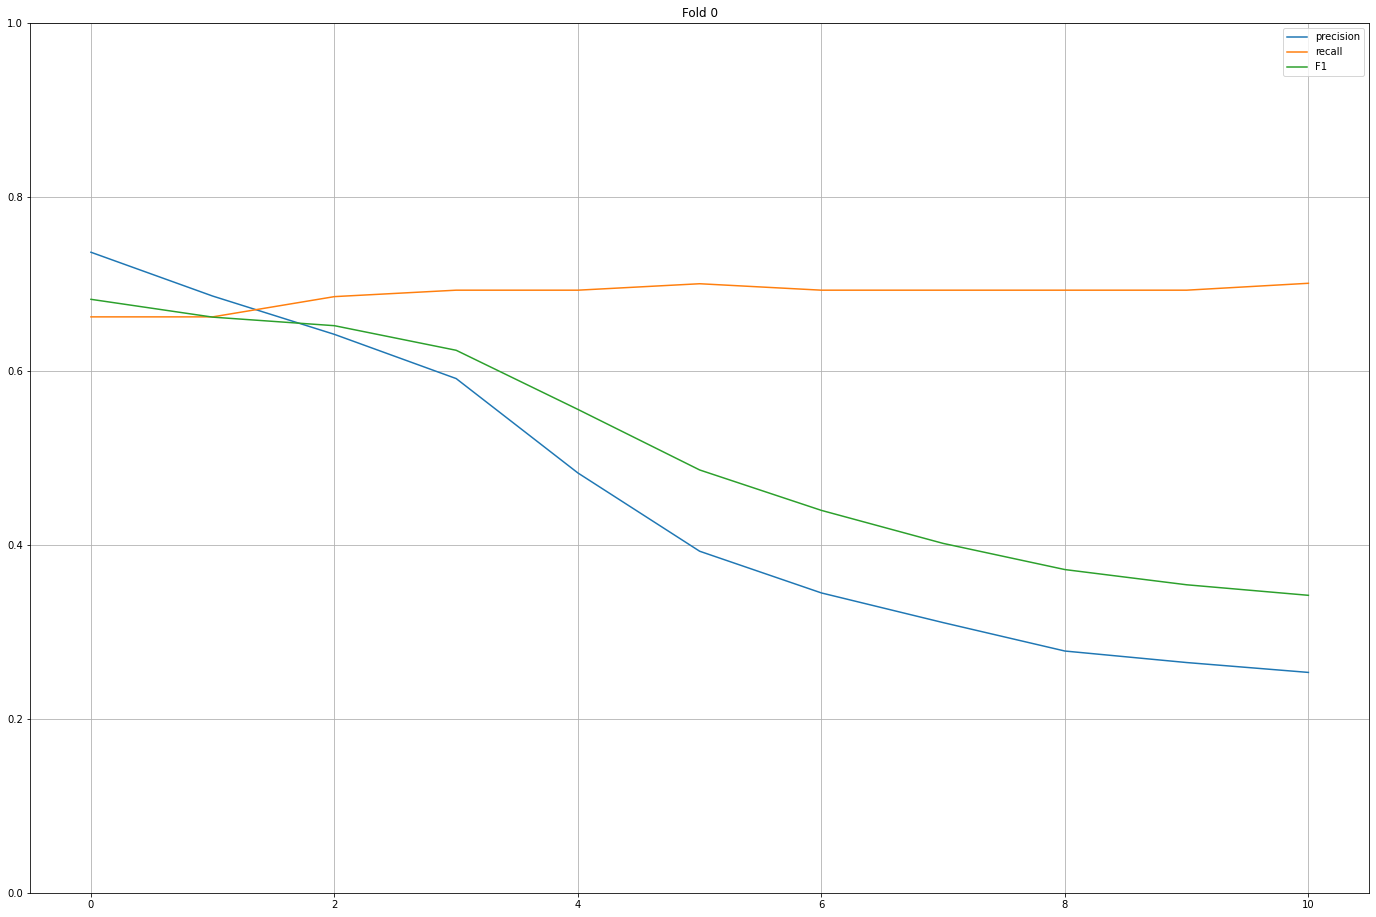

plot saved as fold_plots/FOLD_0_plot.png
FOLD: 1
results pivot saved to: results_pivot_tables/WEIGHT_0_FOLD_1.csv
results pivot saved to: results_pivot_tables/WEIGHT_1_FOLD_1.csv
results pivot saved to: results_pivot_tables/WEIGHT_2_FOLD_1.csv
results pivot saved to: results_pivot_tables/WEIGHT_3_FOLD_1.csv
results pivot saved to: results_pivot_tables/WEIGHT_4_FOLD_1.csv
results pivot saved to: results_pivot_tables/WEIGHT_5_FOLD_1.csv
results pivot saved to: results_pivot_tables/WEIGHT_6_FOLD_1.csv
results pivot saved to: results_pivot_tables/WEIGHT_7_FOLD_1.csv
results pivot saved to: results_pivot_tables/WEIGHT_8_FOLD_1.csv
results pivot saved to: results_pivot_tables/WEIGHT_9_FOLD_1.csv
results pivot saved to: results_pivot_tables/WEIGHT_10_FOLD_1.csv


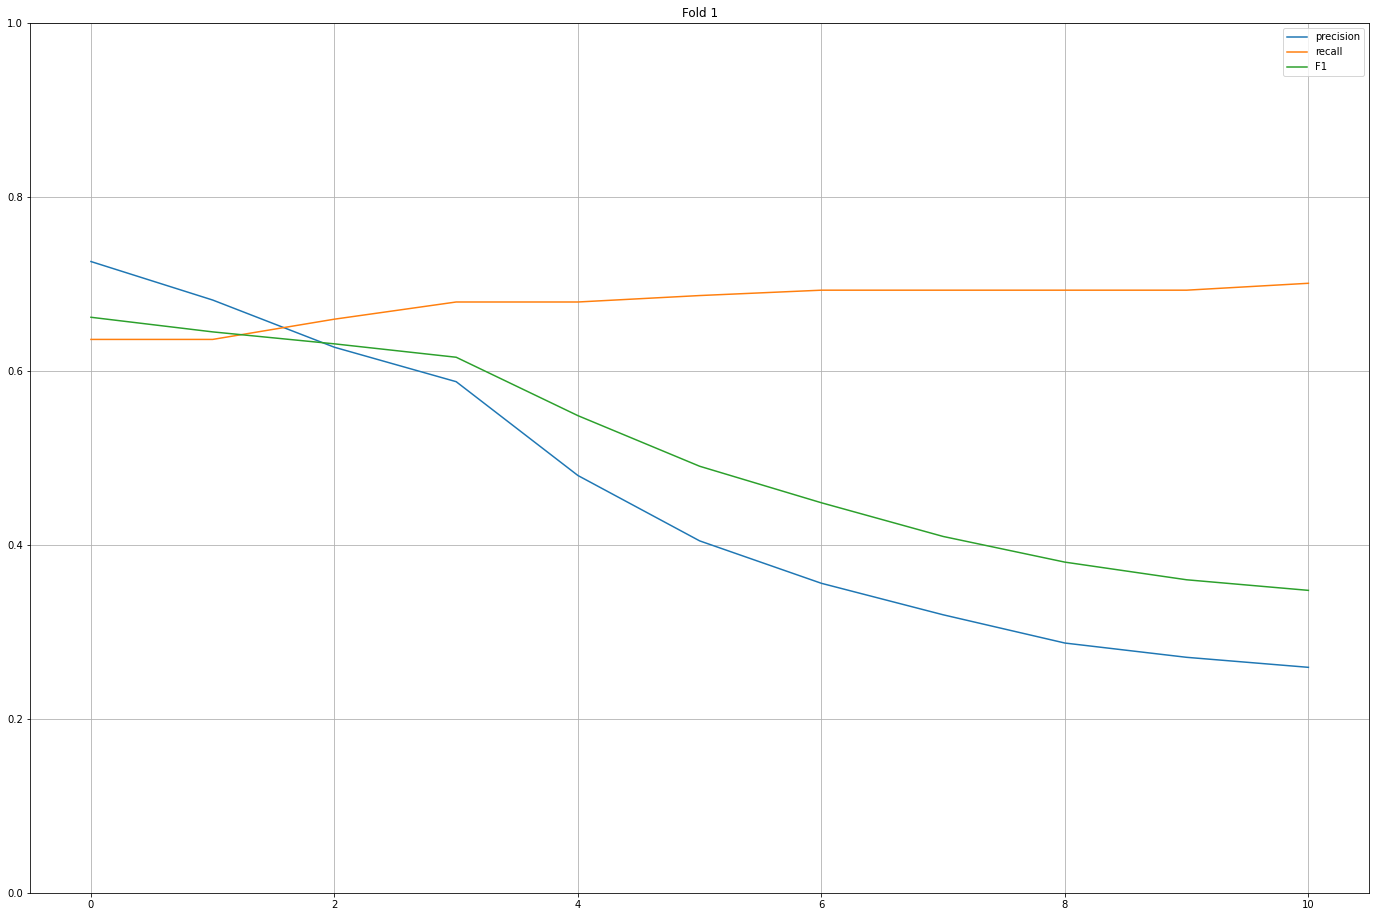

plot saved as fold_plots/FOLD_1_plot.png
FOLD: 2
results pivot saved to: results_pivot_tables/WEIGHT_0_FOLD_2.csv
results pivot saved to: results_pivot_tables/WEIGHT_1_FOLD_2.csv
results pivot saved to: results_pivot_tables/WEIGHT_2_FOLD_2.csv
results pivot saved to: results_pivot_tables/WEIGHT_3_FOLD_2.csv
results pivot saved to: results_pivot_tables/WEIGHT_4_FOLD_2.csv
results pivot saved to: results_pivot_tables/WEIGHT_5_FOLD_2.csv
results pivot saved to: results_pivot_tables/WEIGHT_6_FOLD_2.csv
results pivot saved to: results_pivot_tables/WEIGHT_7_FOLD_2.csv
results pivot saved to: results_pivot_tables/WEIGHT_8_FOLD_2.csv
results pivot saved to: results_pivot_tables/WEIGHT_9_FOLD_2.csv
results pivot saved to: results_pivot_tables/WEIGHT_10_FOLD_2.csv


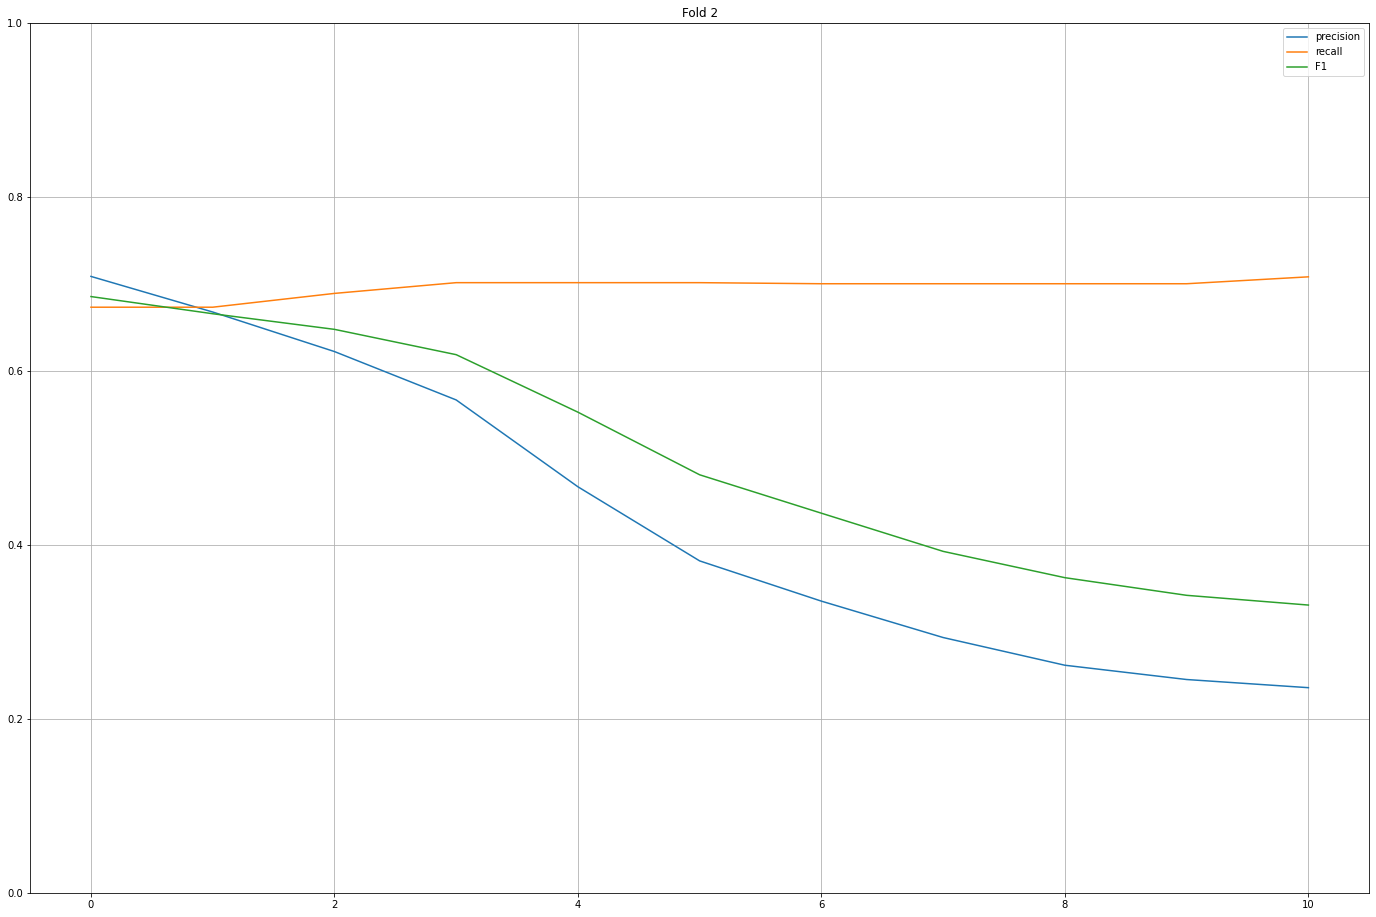

plot saved as fold_plots/FOLD_2_plot.png
FOLD: 3
results pivot saved to: results_pivot_tables/WEIGHT_0_FOLD_3.csv
results pivot saved to: results_pivot_tables/WEIGHT_1_FOLD_3.csv
results pivot saved to: results_pivot_tables/WEIGHT_2_FOLD_3.csv
results pivot saved to: results_pivot_tables/WEIGHT_3_FOLD_3.csv
results pivot saved to: results_pivot_tables/WEIGHT_4_FOLD_3.csv
results pivot saved to: results_pivot_tables/WEIGHT_5_FOLD_3.csv
results pivot saved to: results_pivot_tables/WEIGHT_6_FOLD_3.csv
results pivot saved to: results_pivot_tables/WEIGHT_7_FOLD_3.csv
results pivot saved to: results_pivot_tables/WEIGHT_8_FOLD_3.csv
results pivot saved to: results_pivot_tables/WEIGHT_9_FOLD_3.csv
results pivot saved to: results_pivot_tables/WEIGHT_10_FOLD_3.csv


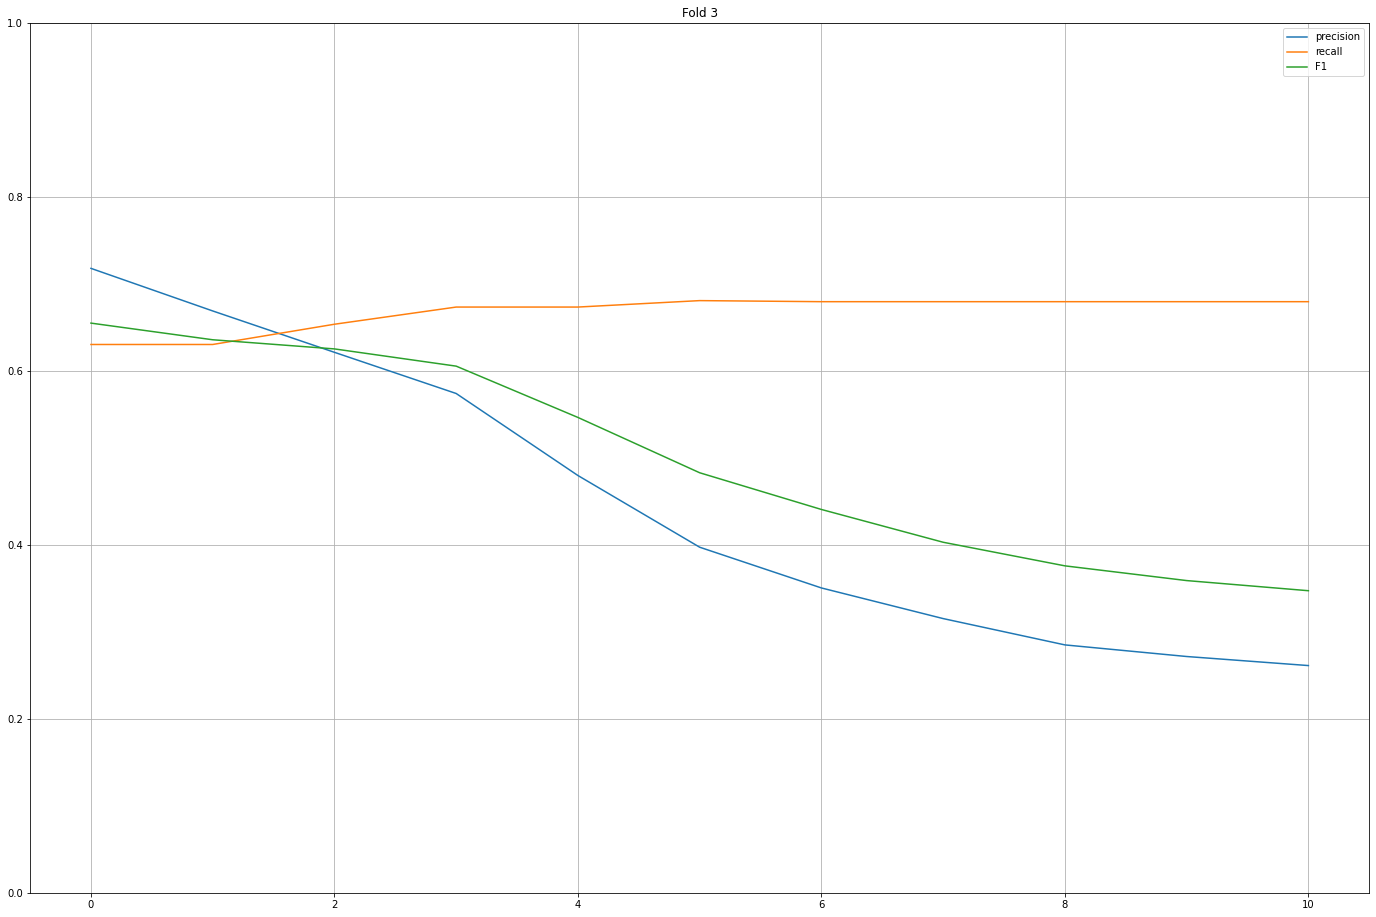

plot saved as fold_plots/FOLD_3_plot.png
FOLD: 4
results pivot saved to: results_pivot_tables/WEIGHT_0_FOLD_4.csv
results pivot saved to: results_pivot_tables/WEIGHT_1_FOLD_4.csv
results pivot saved to: results_pivot_tables/WEIGHT_2_FOLD_4.csv
results pivot saved to: results_pivot_tables/WEIGHT_3_FOLD_4.csv
results pivot saved to: results_pivot_tables/WEIGHT_4_FOLD_4.csv
results pivot saved to: results_pivot_tables/WEIGHT_5_FOLD_4.csv
results pivot saved to: results_pivot_tables/WEIGHT_6_FOLD_4.csv
results pivot saved to: results_pivot_tables/WEIGHT_7_FOLD_4.csv
results pivot saved to: results_pivot_tables/WEIGHT_8_FOLD_4.csv
results pivot saved to: results_pivot_tables/WEIGHT_9_FOLD_4.csv
results pivot saved to: results_pivot_tables/WEIGHT_10_FOLD_4.csv


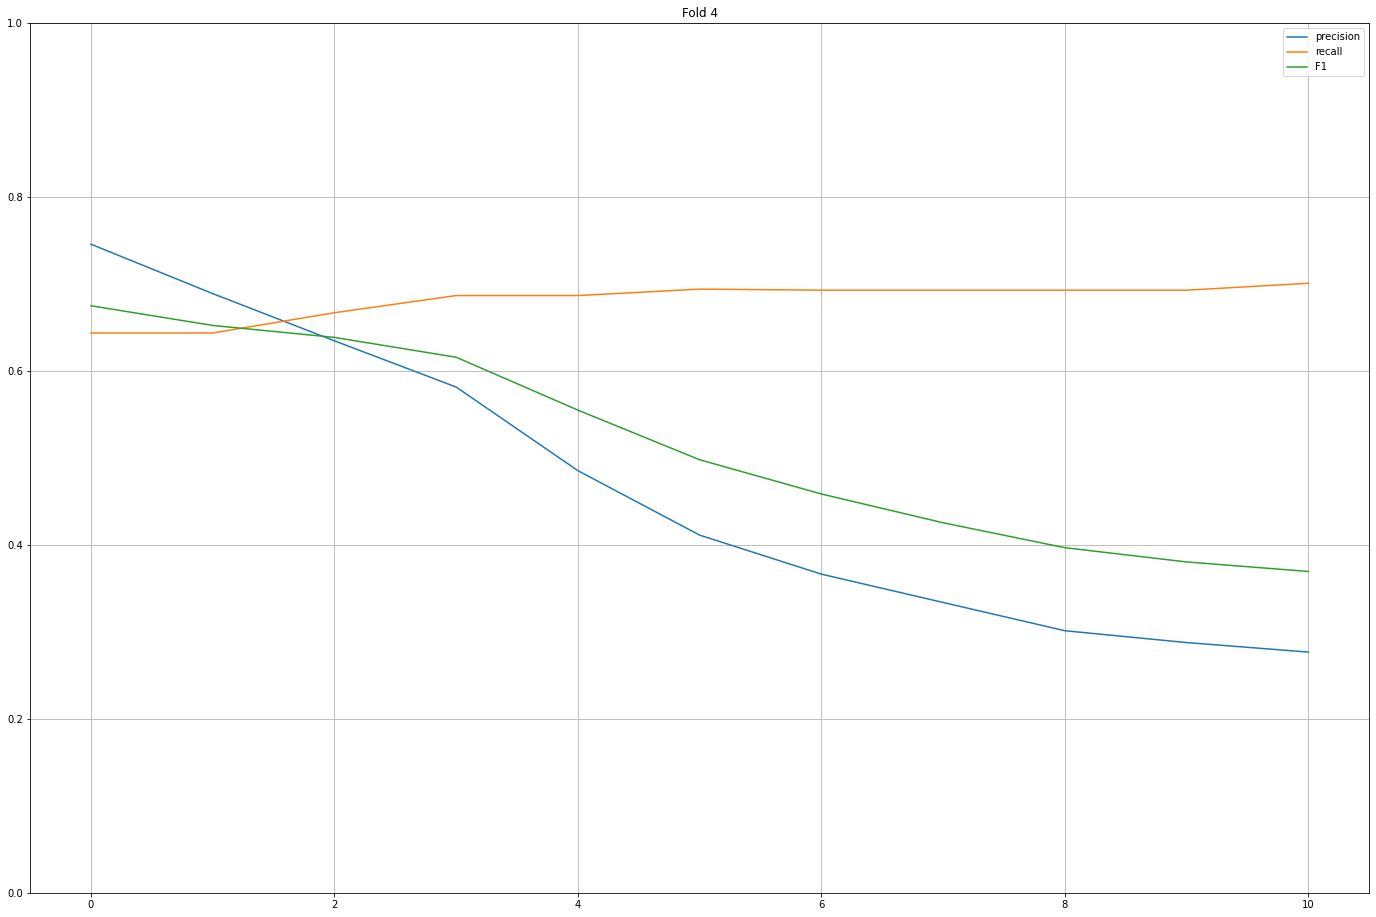

plot saved as fold_plots/FOLD_4_plot.png
FOLD: 5
results pivot saved to: results_pivot_tables/WEIGHT_0_FOLD_5.csv
results pivot saved to: results_pivot_tables/WEIGHT_1_FOLD_5.csv
results pivot saved to: results_pivot_tables/WEIGHT_2_FOLD_5.csv
results pivot saved to: results_pivot_tables/WEIGHT_3_FOLD_5.csv
results pivot saved to: results_pivot_tables/WEIGHT_4_FOLD_5.csv
results pivot saved to: results_pivot_tables/WEIGHT_5_FOLD_5.csv
results pivot saved to: results_pivot_tables/WEIGHT_6_FOLD_5.csv
results pivot saved to: results_pivot_tables/WEIGHT_7_FOLD_5.csv
results pivot saved to: results_pivot_tables/WEIGHT_8_FOLD_5.csv
results pivot saved to: results_pivot_tables/WEIGHT_9_FOLD_5.csv
results pivot saved to: results_pivot_tables/WEIGHT_10_FOLD_5.csv


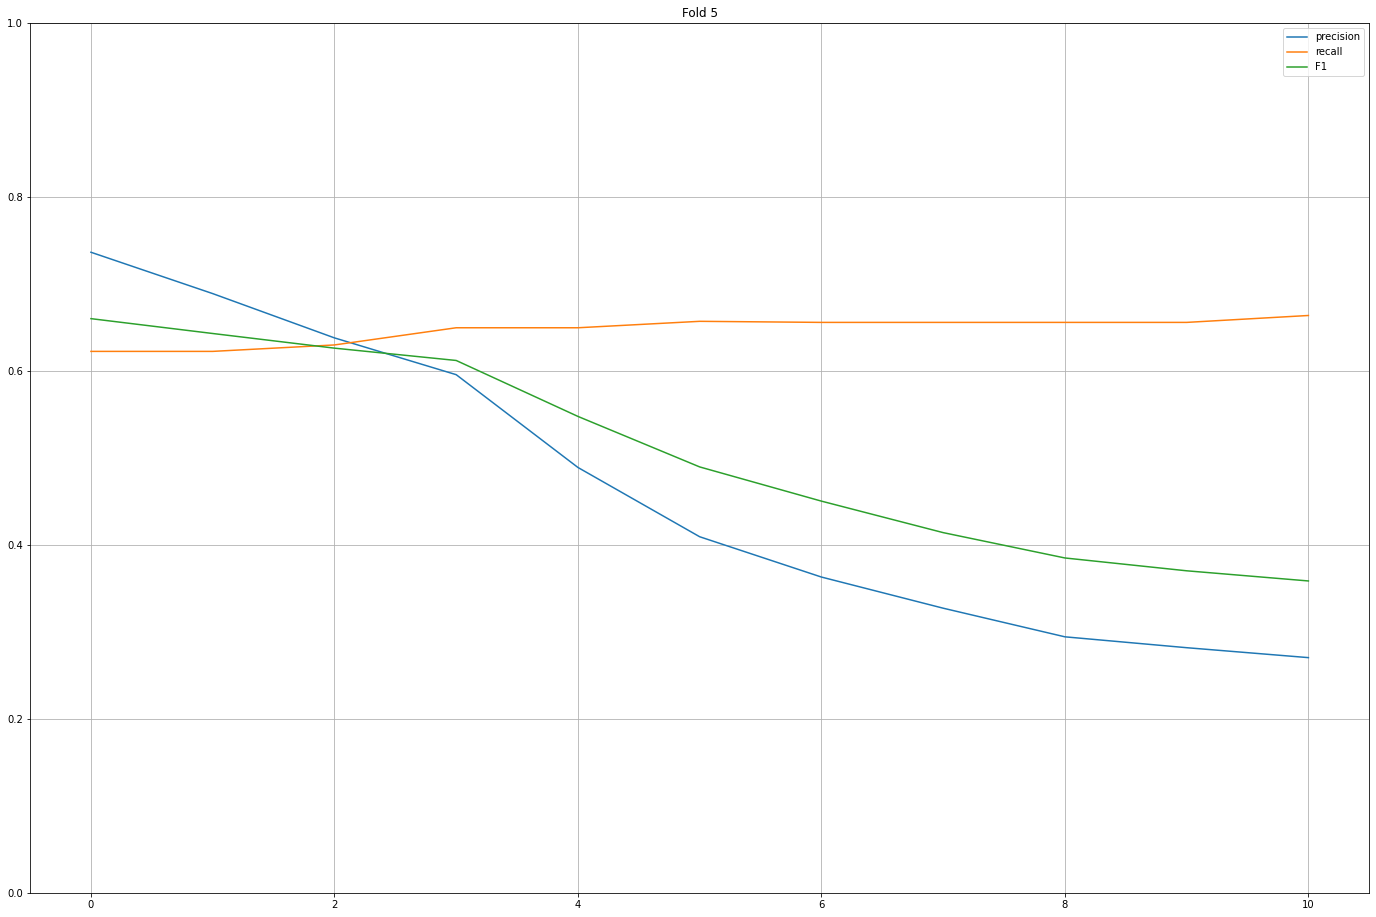

plot saved as fold_plots/FOLD_5_plot.png
FOLD: 6
results pivot saved to: results_pivot_tables/WEIGHT_0_FOLD_6.csv
results pivot saved to: results_pivot_tables/WEIGHT_1_FOLD_6.csv
results pivot saved to: results_pivot_tables/WEIGHT_2_FOLD_6.csv
results pivot saved to: results_pivot_tables/WEIGHT_3_FOLD_6.csv
results pivot saved to: results_pivot_tables/WEIGHT_4_FOLD_6.csv
results pivot saved to: results_pivot_tables/WEIGHT_5_FOLD_6.csv
results pivot saved to: results_pivot_tables/WEIGHT_6_FOLD_6.csv
results pivot saved to: results_pivot_tables/WEIGHT_7_FOLD_6.csv
results pivot saved to: results_pivot_tables/WEIGHT_8_FOLD_6.csv
results pivot saved to: results_pivot_tables/WEIGHT_9_FOLD_6.csv
results pivot saved to: results_pivot_tables/WEIGHT_10_FOLD_6.csv


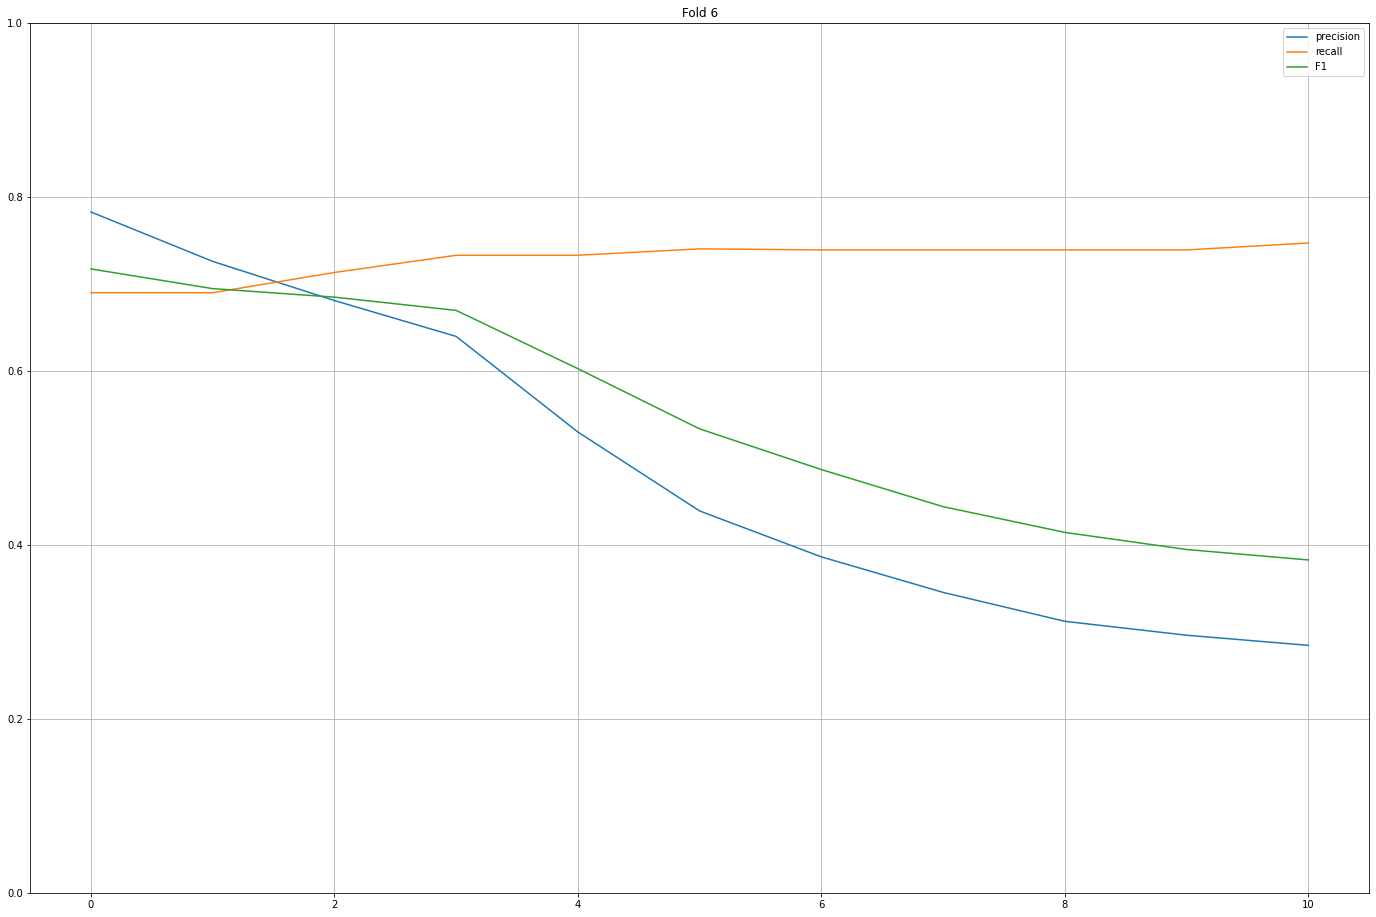

plot saved as fold_plots/FOLD_6_plot.png
FOLD: 7
results pivot saved to: results_pivot_tables/WEIGHT_0_FOLD_7.csv
results pivot saved to: results_pivot_tables/WEIGHT_1_FOLD_7.csv
results pivot saved to: results_pivot_tables/WEIGHT_2_FOLD_7.csv
results pivot saved to: results_pivot_tables/WEIGHT_3_FOLD_7.csv
results pivot saved to: results_pivot_tables/WEIGHT_4_FOLD_7.csv
results pivot saved to: results_pivot_tables/WEIGHT_5_FOLD_7.csv
results pivot saved to: results_pivot_tables/WEIGHT_6_FOLD_7.csv
results pivot saved to: results_pivot_tables/WEIGHT_7_FOLD_7.csv
results pivot saved to: results_pivot_tables/WEIGHT_8_FOLD_7.csv
results pivot saved to: results_pivot_tables/WEIGHT_9_FOLD_7.csv
results pivot saved to: results_pivot_tables/WEIGHT_10_FOLD_7.csv


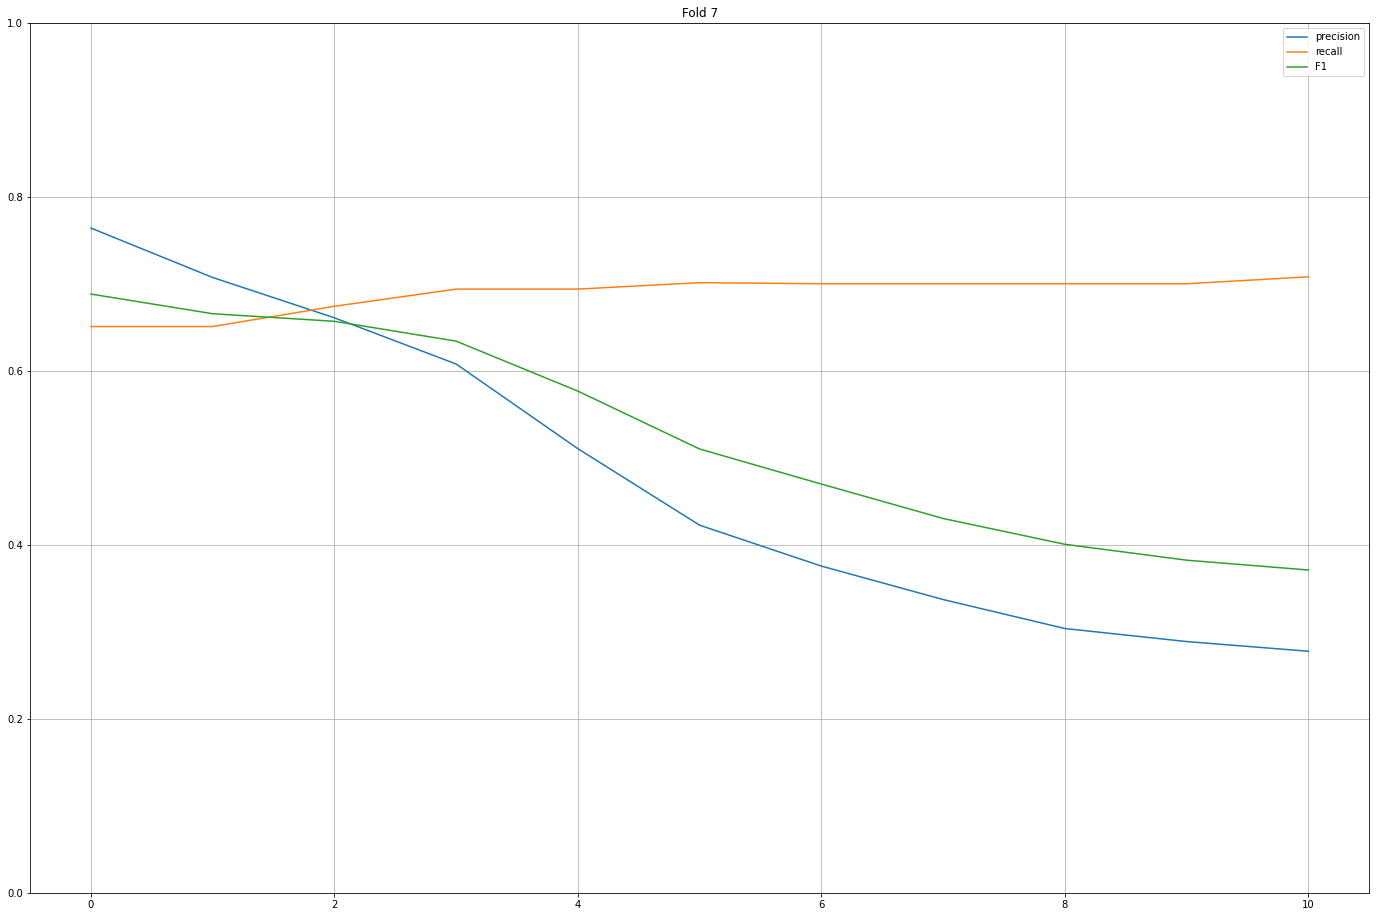

plot saved as fold_plots/FOLD_7_plot.png
FOLD: 9
results pivot saved to: results_pivot_tables/WEIGHT_0_FOLD_9.csv
results pivot saved to: results_pivot_tables/WEIGHT_1_FOLD_9.csv
results pivot saved to: results_pivot_tables/WEIGHT_2_FOLD_9.csv
results pivot saved to: results_pivot_tables/WEIGHT_3_FOLD_9.csv
results pivot saved to: results_pivot_tables/WEIGHT_4_FOLD_9.csv
results pivot saved to: results_pivot_tables/WEIGHT_5_FOLD_9.csv
results pivot saved to: results_pivot_tables/WEIGHT_6_FOLD_9.csv
results pivot saved to: results_pivot_tables/WEIGHT_7_FOLD_9.csv
results pivot saved to: results_pivot_tables/WEIGHT_8_FOLD_9.csv
results pivot saved to: results_pivot_tables/WEIGHT_9_FOLD_9.csv
results pivot saved to: results_pivot_tables/WEIGHT_10_FOLD_9.csv


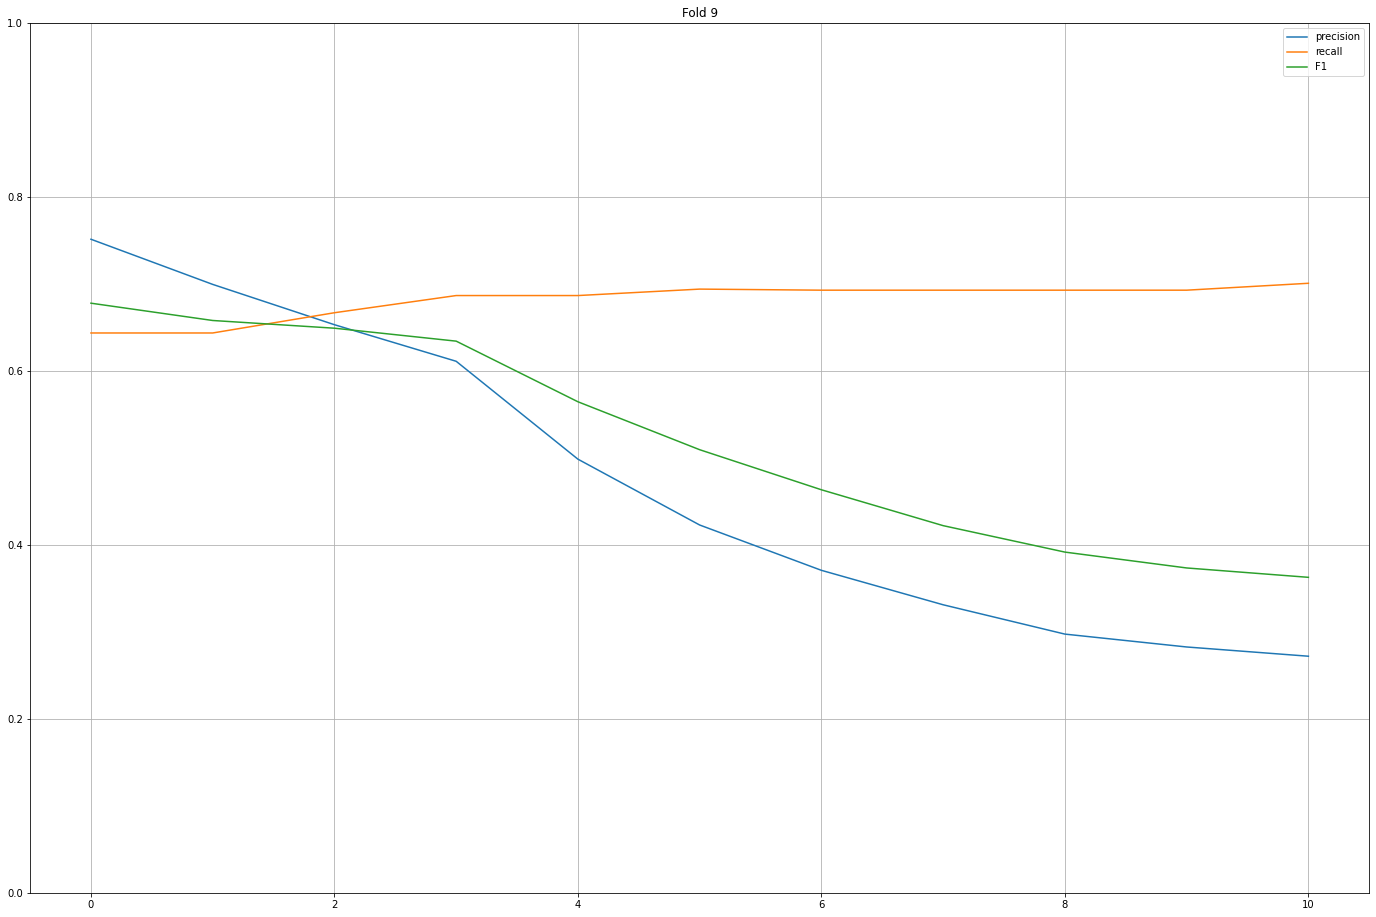

plot saved as fold_plots/FOLD_9_plot.png
FOLD: <NA>


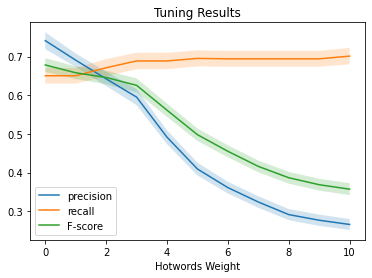

Mean test precision: 0.5444387321580304 (0.19911043767786793)
Mean test recall: 0.649647266313933 (0.2018788944972897)
Mean test F1: 0.649647266313933 (0.2018788944972897)
Man test WER: 4.411315666366124 (12.487938494615914)


In [37]:
import numpy as np
from statistics import mean, stdev

folds_unique = set(dfs[0].fold.values)
print(folds_unique)

all_macro_average_precisions = [] 
all_macro_average_recalls = [] 
all_Fscores = []
all_WERS = []

test_precisions = []
test_recalls = []
test_F1s = []
test_WERS = []


for fold in list(folds_unique):
    print(f"FOLD: {fold}")
    if fold is pd.NA:
        continue
    
    macro_average_precisions, macro_average_recalls, Fscores, WERS, test_precision, test_recall, test_F1, test_avg_wer = process_fold(fold, dfs)
    all_macro_average_precisions.append(macro_average_precisions)
    all_macro_average_recalls.append(macro_average_recalls)
    all_Fscores.append(Fscores)
    all_WERS.append(WERS)
    

    test_precisions.append(test_precision)
    test_recalls.append(test_recall)
    test_F1s.append(test_F1)
    test_WERS.append(test_avg_wer)
    
precisions_np = np.array(all_macro_average_precisions)
recalls_np = np.array(all_macro_average_recalls)
Fscores_np = np.array(all_Fscores)
WERS_np = np.array(all_WERS)

plot_averages(precisions_np, recalls_np, Fscores_np, WERS_np)


print(f"Mean test precision: {mean(test_precisions)} ({stdev(test_precisions)})")
print(f"Mean test recall: {mean(test_recalls)} ({stdev(test_recalls)})")
print(f"Mean test F1: {mean(test_F1s)} ({stdev(test_F1s)})")
print(f"Man test WER: {mean(test_WERS)} ({stdev(test_WERS)})")
# print(precisions_mean)
# input()

In [38]:
!ls results_pivot_tables

WEIGHT_0_FOLD_0.csv   WEIGHT_2_FOLD_6.csv  WEIGHT_6_FOLD_3.csv
WEIGHT_0_FOLD_1.csv   WEIGHT_2_FOLD_7.csv  WEIGHT_6_FOLD_4.csv
WEIGHT_0_FOLD_2.csv   WEIGHT_2_FOLD_9.csv  WEIGHT_6_FOLD_5.csv
WEIGHT_0_FOLD_3.csv   WEIGHT_3_FOLD_0.csv  WEIGHT_6_FOLD_6.csv
WEIGHT_0_FOLD_4.csv   WEIGHT_3_FOLD_1.csv  WEIGHT_6_FOLD_7.csv
WEIGHT_0_FOLD_5.csv   WEIGHT_3_FOLD_2.csv  WEIGHT_6_FOLD_9.csv
WEIGHT_0_FOLD_6.csv   WEIGHT_3_FOLD_3.csv  WEIGHT_7_FOLD_0.csv
WEIGHT_0_FOLD_7.csv   WEIGHT_3_FOLD_4.csv  WEIGHT_7_FOLD_1.csv
WEIGHT_0_FOLD_9.csv   WEIGHT_3_FOLD_5.csv  WEIGHT_7_FOLD_2.csv
WEIGHT_10_FOLD_0.csv  WEIGHT_3_FOLD_6.csv  WEIGHT_7_FOLD_3.csv
WEIGHT_10_FOLD_1.csv  WEIGHT_3_FOLD_7.csv  WEIGHT_7_FOLD_4.csv
WEIGHT_10_FOLD_2.csv  WEIGHT_3_FOLD_9.csv  WEIGHT_7_FOLD_5.csv
WEIGHT_10_FOLD_3.csv  WEIGHT_4_FOLD_0.csv  WEIGHT_7_FOLD_6.csv
WEIGHT_10_FOLD_4.csv  WEIGHT_4_FOLD_1.csv  WEIGHT_7_FOLD_7.csv
WEIGHT_10_FOLD_5.csv  WEIGHT_4_FOLD_2.csv  WEIGHT_7_FOLD_9.csv
WEIGHT_10_FOLD_6.csv  WEIGHT_4_FOLD_3.csv  WEIGHT_8_FOL

In [39]:
all_files = []

for root, dirs, files in os.walk("results_pivot_tables"):
    
    for file in files:
        if not file.endswith('.csv'):
            continue
        if not ("FOLD_0") in file:
            continue
        
        weight = int(file.split('_')[1])
        
        path = os.path.join(root, file)
        
        all_files.append((path,weight))
all_files.sort(key=lambda x:x[1])


